In [283]:
import matplotlib.pyplot as plt
import autograd.numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
import pandas as pd
from scipy.stats import uniform, loguniform

from estimator import NNEstimator
from neuralnetwork import NeuralNetwork, OLS
from utils import derivative, DesignMatrix, ModelDict
from activation import Sigmoid, ReLU, SoftMax, Linear

%matplotlib widget

In [279]:
n = 100
x = np.linspace(-1, 1, n)
y = 2*x + 9*x**2 + 4*x**3
y = y.reshape(-1, 1)

p = 3
X = DesignMatrix(p, x)

scaler = MaxAbsScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

md = ModelDict(
    p+1,
    [20, 20, 1],
    [ReLU, ReLU, Linear]
)

param_grid = {
    'eta': loguniform(1e-2, 1e-1)
}

cv = RandomizedSearchCV(
    estimator=NNEstimator(
        model_structure=md,
        loss_fn=OLS,
        epochs=100,
        regularization=0
    ),
    param_distributions=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=8,
    random_state=125,
    n_iter=50
)

cv.fit(X, y)

print(cv.best_params_)
print(-cv.best_score_)

{'eta': 0.01084314325457851}
1018.2726722320888


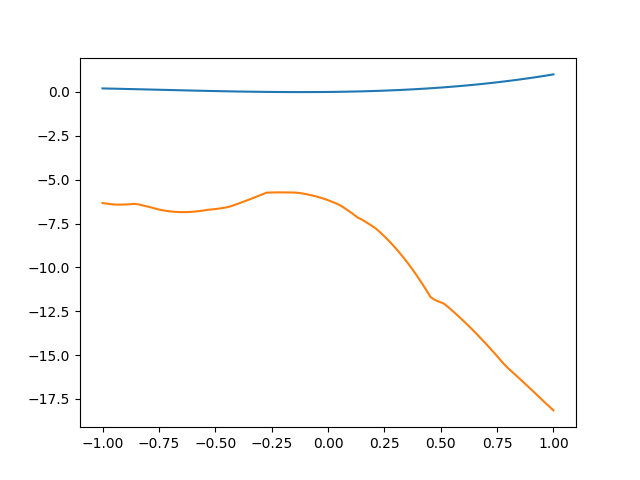

In [280]:
model = cv.best_estimator_

plt.figure()
plt.plot(x, y)

pred = model.predict(X)
plt.plot(x, pred)

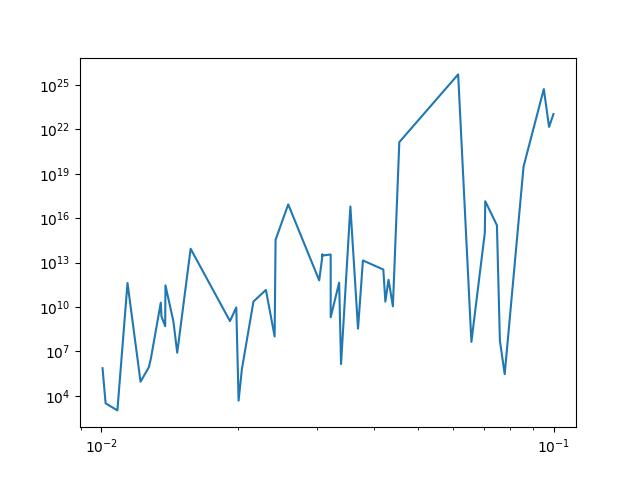

In [281]:
results = cv.cv_results_

mse = -results['mean_test_score']
etas = np.asarray(results['param_eta'], dtype=np.float64)

mse = mse[etas.argsort()]
etas = np.sort(etas)

plt.figure()
plt.xscale('log')
plt.yscale('log')

plt.plot(etas, mse)

In [282]:

pd.DataFrame(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.119248,0.006568,0.001988,0.001585,0.032116,{'eta': 0.032116337379801206},-9.980966e+09,-4.182221e+05,-5.321063e+01,-4.573074e+03,-1.752577e+07,-1.999783e+09,3.990597e+09,19
1,0.129832,0.026281,0.001231,0.000228,0.011416,{'eta': 0.011416439911513927},-2.064233e+12,-8.223223e-01,-1.159249e+02,-1.147907e+05,-6.326049e+04,-4.128466e+11,8.256930e+11,28
2,0.137388,0.013436,0.001137,0.000075,0.042421,{'eta': 0.04242091050422915},-3.612819e+03,-3.510400e+02,-1.690201e+02,-4.006445e+01,-1.144449e+11,-2.288898e+10,4.577796e+10,24
3,0.119472,0.012656,0.001289,0.000236,0.013569,{'eta': 0.013569146369592522},-4.462509e+03,-2.005523e+04,-2.245638e+02,-1.153387e+10,-8.712439e+03,-2.306781e+09,4.613545e+09,20
4,0.120659,0.009870,0.001209,0.000114,0.013523,{'eta': 0.013523376825532667},-1.416247e+07,-1.204533e+07,-9.740873e+10,-1.110902e+01,-4.995336e+03,-1.948699e+10,3.896087e+10,23
5,0.136108,0.019940,0.001927,0.001065,0.061453,{'eta': 0.06145312986655682},-7.689178e+02,-2.568058e+26,-9.195804e+19,-2.219902e+02,-2.478353e+12,-5.136117e+25,1.027223e+26,50
6,0.118147,0.008410,0.001657,0.000777,0.032113,{'eta': 0.032113386845028666},-3.729937e+11,-5.183864e+07,-2.302327e+08,-1.635770e+14,-1.108732e+13,-3.500752e+13,6.442495e+13,36
7,0.121321,0.006961,0.001174,0.000087,0.025872,{'eta': 0.025871766100846915},-3.503063e+17,-6.103073e+03,-7.283287e+16,-7.074898e+02,-7.106417e+06,-8.462783e+16,1.358012e+17,43
8,0.141732,0.007065,0.001504,0.000568,0.037845,{'eta': 0.037845016326428345},-6.166969e+06,-1.580900e+04,-1.262123e+02,-3.283324e+05,-6.873499e+13,-1.374700e+13,2.749400e+13,33
9,0.155505,0.038389,0.001234,0.000112,0.030773,{'eta': 0.0307733240172716},-6.727139e+02,-1.219987e+00,-7.831876e+01,-1.468108e+14,-3.825877e+11,-2.943868e+13,5.868625e+13,35
